# Homework  
Data documentation: https://tidyr.tidyverse.org/reference/who.html

__Directions:__ Answer the three questions below. Create as many code/markdown blocks necessary to answer the questions. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/who.csv')

In [2]:
df.head()

,country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,1983,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,1984,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.drop(columns=['iso2', 'iso3'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7240 entries, 0 to 7239
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       7240 non-null   object 
 1   year          7240 non-null   int64  
 2   new_sp_m014   3173 non-null   float64
 3   new_sp_m1524  3209 non-null   float64
 4   new_sp_m2534  3206 non-null   float64
 5   new_sp_m3544  3219 non-null   float64
 6   new_sp_m4554  3223 non-null   float64
 7   new_sp_m5564  3218 non-null   float64
 8   new_sp_m65    3209 non-null   float64
 9   new_sp_f014   3174 non-null   float64
 10  new_sp_f1524  3194 non-null   float64
 11  new_sp_f2534  3200 non-null   float64
 12  new_sp_f3544  3199 non-null   float64
 13  new_sp_f4554  3204 non-null   float64
 14  new_sp_f5564  3195 non-null   float64
 15  new_sp_f65    3197 non-null   float64
 16  new_sn_m014   1045 non-null   float64
 17  new_sn_m1524  1030 non-null   float64
 18  new_sn_m2534  1022 non-null 

## Printed the column names

In [4]:
df.columns

Index(['country', 'year', 'new_sp_m014', 'new_sp_m1524', 'new_sp_m2534',
       'new_sp_m3544', 'new_sp_m4554', 'new_sp_m5564', 'new_sp_m65',
       'new_sp_f014', 'new_sp_f1524', 'new_sp_f2534', 'new_sp_f3544',
       'new_sp_f4554', 'new_sp_f5564', 'new_sp_f65', 'new_sn_m014',
       'new_sn_m1524', 'new_sn_m2534', 'new_sn_m3544', 'new_sn_m4554',
       'new_sn_m5564', 'new_sn_m65', 'new_sn_f014', 'new_sn_f1524',
       'new_sn_f2534', 'new_sn_f3544', 'new_sn_f4554', 'new_sn_f5564',
       'new_sn_f65', 'new_ep_m014', 'new_ep_m1524', 'new_ep_m2534',
       'new_ep_m3544', 'new_ep_m4554', 'new_ep_m5564', 'new_ep_m65',
       'new_ep_f014', 'new_ep_f1524', 'new_ep_f2534', 'new_ep_f3544',
       'new_ep_f4554', 'new_ep_f5564', 'new_ep_f65', 'newrel_m014',
       'newrel_m1524', 'newrel_m2534', 'newrel_m3544', 'newrel_m4554',
       'newrel_m5564', 'newrel_m65', 'newrel_f014', 'newrel_f1524',
       'newrel_f2534', 'newrel_f3544', 'newrel_f4554', 'newrel_f5564',
       'newrel_f65'],
   

## Question 1. We need to know what's included in this data.
- How many countries are present?  
- What's the timespan of the data?  
- Does each country have a row for every year present?  
- Which countries are missing years?  
- How many rows have at least 1 non-null values across the columns 3-57?

##  I have used nunique function to get the count of distinct countries.

In [5]:
# Code cell 

df['country'].nunique() #according to the output there are 219 countries in dataset

219

### To find the timespan, I have first found the maximum year and minimum year, then the difference of them

In [6]:
# timespan of data

print("The maximum year is", df['year'].max())
print("The minimum year is", df['year'].min())
print("The timespan of the data is", (df['year'].max())-(df['year'].min()))

The maximum year is 2013
The minimum year is 1980
The timespan of the data is 33


## Does each country have a row for every year present?

In [7]:
years = df['year'].nunique() 

print("Unique years are", years)

country = df ['country'].nunique()

print("Unique countries are", country)

# The following groupby is used to group by country by selecting year from each group (result-unique years for each country)
# Then finding the distinct results from this groupby and then comparing it with length of unique years.
# If it is true, then every country has a row for each year but when it is false it is missing.  

result = df.groupby('country')['year'].nunique() == len(df['year'].unique())

# sum of the result where each country has a row for every year.

print("The number of countries which have a row for every year are ",result.sum(),"countries") 



Unique years are 34
Unique countries are 219
The number of countries which have a row for every year are  210 countries


## which countries are missing years

In [8]:
missing_years = result[~result].index.tolist() 

# The above statement gets the values which are false (countries with missing years and convert them to list)

print("Countries with missing years:",missing_years)

Countries with missing years: ['Bonaire, Saint Eustatius and Saba', 'Curacao', 'Montenegro', 'Netherlands Antilles', 'Serbia', 'Serbia & Montenegro', 'Sint Maarten (Dutch part)', 'South Sudan', 'Timor-Leste']


## How many rows have at least 1 non-null values across the columns 3-57?

In [9]:
# notna method is used to check whether values in the series have atleast 1 non null value, 
# any is used to check whether atleast one element satisfies the condition

non_null_values = df.iloc[:,3:58].notna().any(axis=1) # I have kept 58 because the end value is exclusive.
sum_nonnull_values = non_null_values.sum() # getting sum of non_null_values in the series 3 to 57, 
print("Number of rows with at least 1 non-null values across columns 3-57 is", sum_nonnull_values)

Number of rows with at least 1 non-null values across columns 3-57 is 3484


## Question 2: Wide data isn't usually helpful.
Convert this to a long format with the following columns:  
1. country  
2. year  
3. diagnosis method: mapping should be: 

```
  {'newsp':'Pulmonary Smear (+)'
  ,'newsn':'Pulmonary Smear (-)'
  ,'newep':'Extrapulmonary'
  ,'newrel':'Relapse'}   
 ```

4. gender: male or female.   
5. age: lower_age - higher_age, e.g., 0-14  
6. number of cases  

__Note__: You can use `replace` (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)

In [10]:
# Code

# replace the column names based on the above diagnosis mapping

df = df.replace({'new_sp':'newsp','new_sn':'newsn','new_ep':'newep'})

diagnosismethod_mapping = {
    'newsp': 'Pulmonary Smear (+)',
    'newsn': 'Pulmonary Smear (-)',
    'newep': 'Extrapulmonary',
    'newrel': 'Relapse'
}


dfLong = pd.melt(df, 
                 id_vars=['country', 'year'], # columns which are not to be changed
                 var_name='diagnosismethod_gender_age', # variable name for melted columns
                 value_name='number_of_cases' # variable name for melted values 
                )

# Splitting 'diagnosismethod_gender_age' into 'diagnosis method', 'gender', and 'age' columns using regular expression

# Extract the name of the column which is in the format letters_m or f age value(in digits), + is for one or more occurence
dfLong[['diagnosis_method', 'gender_age']] = dfLong['diagnosismethod_gender_age'].str.extract(r'([a-z]+)_([mf][0-9]+)')

# Diagnosis method is mapped with the initialisation of values of diagnosismethod_mapping
dfLong['diagnosis_method'] = dfLong['diagnosis_method'].map(diagnosismethod_mapping)

# Splitting the 'gender_age' into 'gender' and 'age' columns by extracting and assigning m or f values to gender column
# And assigning digits to age group
dfLong[['gender', 'age']] = dfLong['gender_age'].str.extract(r'([mf])([0-9]+)')

# Drop unnecessary columns
dfLong = dfLong.drop(columns=['diagnosismethod_gender_age', 'gender_age'])

#Replacing gender column values, m with male and f with female
dfLong = dfLong.replace({'m':'male','f':'female'})

# Display the resulting long-format DataFrame
print(dfLong)

            country  year  number_of_cases diagnosis_method  gender  age
0       Afghanistan  1980              NaN              NaN    male  014
1       Afghanistan  1981              NaN              NaN    male  014
2       Afghanistan  1982              NaN              NaN    male  014
3       Afghanistan  1983              NaN              NaN    male  014
4       Afghanistan  1984              NaN              NaN    male  014
...             ...   ...              ...              ...     ...  ...
405435     Zimbabwe  2009              NaN          Relapse  female   65
405436     Zimbabwe  2010              NaN          Relapse  female   65
405437     Zimbabwe  2011              NaN          Relapse  female   65
405438     Zimbabwe  2012              NaN          Relapse  female   65
405439     Zimbabwe  2013            725.0          Relapse  female   65

[405440 rows x 6 columns]


In [11]:
dfLong.dtypes # to get the data types of the long format dataset

country              object
year                  int64
number_of_cases     float64
diagnosis_method     object
gender               object
age                  object
dtype: object

In [12]:
dfLong.columns # columns of long format dataset

Index(['country', 'year', 'number_of_cases', 'diagnosis_method', 'gender',
       'age'],
      dtype='object')

## Question 3: Create a graph that shows when countries started to report TB cases.¶


In [13]:
# Code
# found the year when cases are getting reported for each country
# reset_index function is used for resetting the index of dataframe

cases_reporting_years = dfLong[dfLong['number_of_cases'] > 0].groupby('country')['year'].min().reset_index()

In [14]:
cases_reporting_years

,country,year
0,Afghanistan,1997
1,Albania,1995
2,Algeria,1997
3,American Samoa,1997
4,Andorra,1996
...,...,...
212,Wallis and Futuna Islands,1996
213,West Bank and Gaza Strip,1995
214,Yemen,1995
215,Zambia,1995


In [15]:
cases_reporting_years.dtypes # for knowing the data types of grouped data

country    object
year        int64
dtype: object

In [16]:
cases_reporting_years.head()

,country,year
0,Afghanistan,1997
1,Albania,1995
2,Algeria,1997
3,American Samoa,1997
4,Andorra,1996


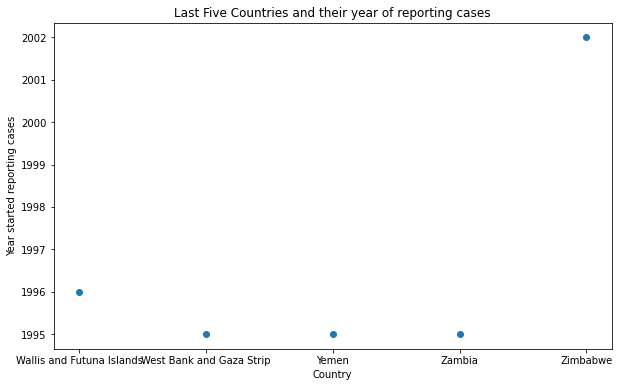

In [17]:
# plotting the countries with less number of cases

plt.figure(figsize=(10, 6))
last_five_countries = cases_reporting_years.tail(5)
plt.scatter(last_five_countries['country'],last_five_countries['year'])

plt.title('Last Five Countries and their year of reporting cases')
plt.xlabel('Country')
plt.ylabel('Year started reporting cases')

plt.show()

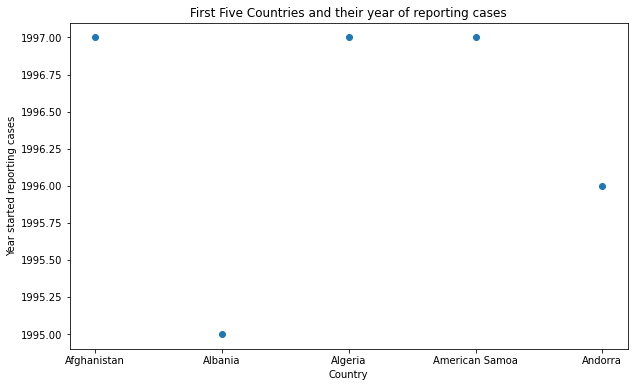

In [18]:
plt.figure(figsize=(10, 6))

first_five_countries = cases_reporting_years.head(5)

plt.scatter(first_five_countries['country'],first_five_countries['year'])

plt.title('First Five Countries and their year of reporting cases')
plt.xlabel('Country')
plt.ylabel('Year started reporting cases')
plt.show()

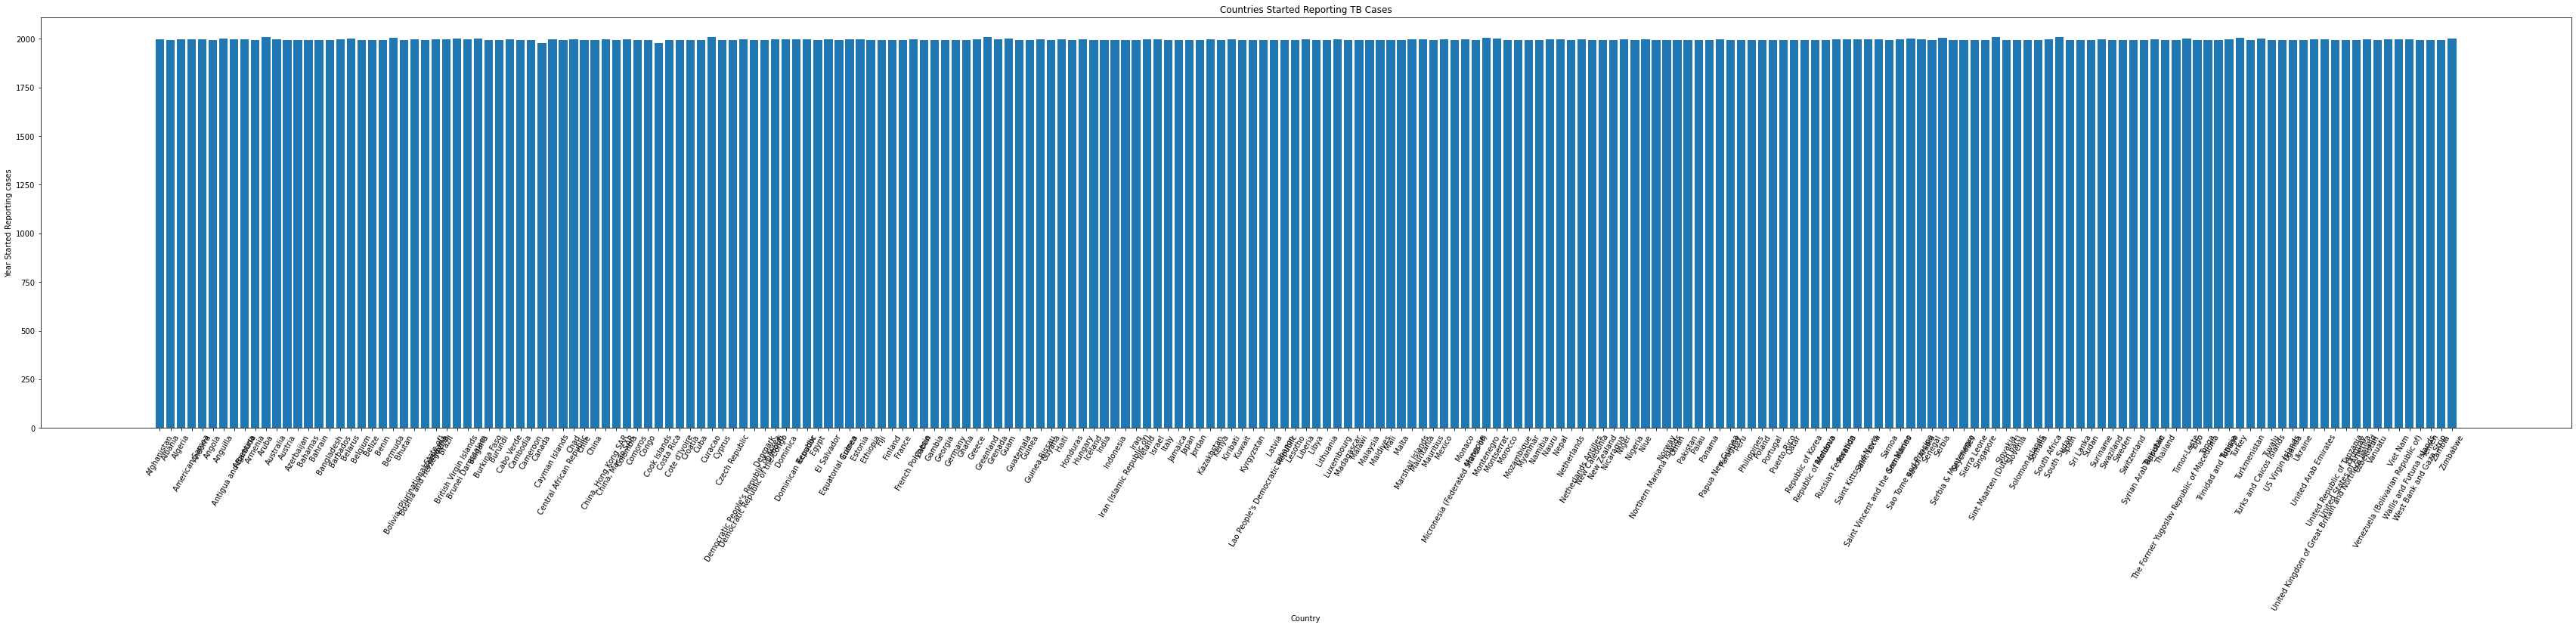

In [19]:
# Create a bar plot to show the countries started reporting cases

plt.figure(figsize=(60,10))
plt.bar(cases_reporting_years['country'], cases_reporting_years['year'])
plt.xlabel('Country')
plt.ylabel('Year Started Reporting cases')
plt.title('Countries Started Reporting TB Cases')
plt.xticks(rotation=60) #to make country name visible
plt.show()
